# Getting distributions of FabLabs from fablabs.io

Requisites:

1. pip install requests
2. pip install pycountry
3. pip install incf.countryutils

In [1]:
import requests
from collections import OrderedDict
import pycountry
from incf.countryutils import transformations
import json

In [2]:
# Load FabLab list
url = "https://api.fablabs.io/v0/labs.json"
fablab_list = requests.get(url, verify=False).json()

/usr/local/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [3]:
# Print a beautified version of the FabLab list for debug
print json.dumps(fablab_list, sort_keys=True, indent=4)

{
    "labs": [
        {
            "address_1": "116 East 97th street", 
            "address_2": "Room 403", 
            "address_notes": "3174 29th Street", 
            "avatar": "https://i.imgur.com/iymHWkm.png", 
            "blurb": "Fab Lab for middle school students at the Marymount School of New York, an all-girls independent school.", 
            "capabilities": [
                "three_d_printing", 
                "cnc_milling", 
                "circuit_production", 
                "laser", 
                "precision_milling", 
                "vinyl_cutting"
            ], 
            "city": "New York", 
            "country_code": "us", 
            "county": "New York", 
            "description": "", 
            "email": "jdec@marymountnyc.org", 
            "header_image_src": "", 
            "id": 104, 
            "kind_name": "fab_lab", 
            "latitude": 40.786553, 
            "links": [
                {
                    "id": 136, 
         

In [4]:
labs = {}
print "There are",len(fablab_list["labs"]),"FabLabs."

There are 606 FabLabs.


In [5]:
# Load data for reordering by continent - country later
groupedlabs = {}

for i in fablab_list["labs"]:
    labs[i["name"]] = {}
    labs[i["name"]]["name"] = i["name"]
    labs[i["name"]]["city"] = i["city"]
    country = pycountry.countries.get(alpha2=i["country_code"].upper())
    labs[i["name"]]["country"] = country.name
    continent = transformations.cca_to_ctn(i["country_code"])
    labs[i["name"]]["continent"] = continent
    
    # Save by continent and country
    if continent not in groupedlabs:
        groupedlabs[continent] = {}
    if country.name not in groupedlabs[continent]:
        groupedlabs[continent][country.name] = {}
    groupedlabs[continent][country.name][i["name"]] = labs[i["name"]]
        

In [6]:
# Order alphabetically

# Get list from continents and countries in the data
continents = []
countries = []
for m in groupedlabs:
    continents.append(m)
    for j in groupedlabs[m]:
        countries.append(j)  
continents = sorted(continents)
countries = sorted(countries)

# Order continents and countries alphabetically
sortedcontinents = OrderedDict(sorted(groupedlabs.items(), key=lambda t: t[0]))
for k in sortedcontinents:
    sortedcontinents[k] = OrderedDict(sorted(sortedcontinents[k].items(), key=lambda t: t[0]))

# Print output for debug
for k in sortedcontinents:
    print ""
    print k
    for h in sortedcontinents[k]:
        print "-",h


Africa
- Burkina Faso
- Côte d'Ivoire
- Egypt
- Ethiopia
- Ghana
- Kenya
- Mali
- Morocco
- Namibia
- Réunion
- Senegal
- South Africa
- Togo

Asia
- Afghanistan
- Bahrain
- China
- Georgia
- India
- Indonesia
- Iran, Islamic Republic of
- Israel
- Japan
- Jordan
- Korea, Republic of
- Kuwait
- Lebanon
- Myanmar
- Philippines
- Saudi Arabia
- Singapore
- Taiwan, Province of China
- Thailand
- Turkey
- United Arab Emirates
- Viet Nam

Europe
- Austria
- Belgium
- Bulgaria
- Croatia
- Czech Republic
- Denmark
- Finland
- France
- Germany
- Greece
- Hungary
- Iceland
- Ireland
- Italy
- Latvia
- Luxembourg
- Malta
- Netherlands
- Norway
- Poland
- Portugal
- Russian Federation
- Serbia
- Slovakia
- Spain
- Sweden
- Switzerland
- Ukraine
- United Kingdom

North America
- Canada
- Costa Rica
- El Salvador
- Guadeloupe
- Mexico
- Puerto Rico
- Trinidad and Tobago
- United States

Oceania
- Australia
- New Zealand

South America
- Argentina
- Brazil
- Chile
- Colombia
- Ecuador
- Paraguay
- 

In [7]:
# Let's start the graphics
%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
import seaborn

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


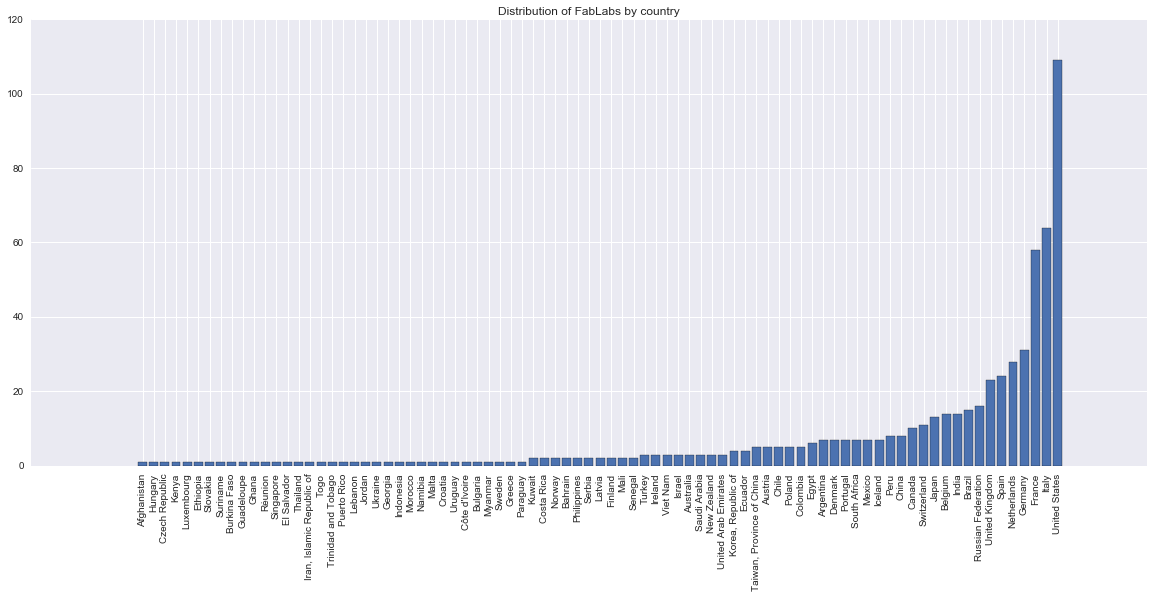

In [8]:
# Get distribution of FabLabs per country

countries_stats = {}

for k in sortedcontinents:
    for h in sortedcontinents[k]:
        countries_stats[h] =  len(sortedcontinents[k][h])
        
countries_stats2 = OrderedDict(sorted(countries_stats.items(), key=lambda t: t[1]))

figure(figsize=(20,8))
plt.bar(range(len(countries_stats2)), countries_stats2.values(), align='center')
plt.xticks(range(len(countries_stats2)), countries_stats2.keys(), rotation=90)
plt.title("Distribution of FabLabs by country")

plt.savefig('FabLabs-CountryDistribution.pdf')

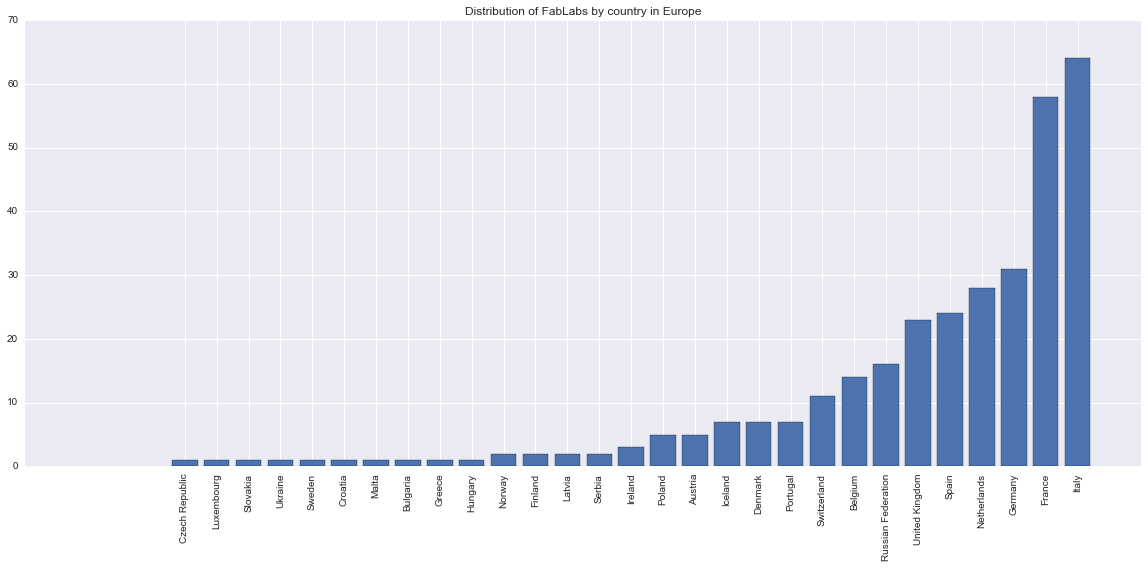

In [17]:
# Get distribution of FabLabs per country, per continent

countries_stats = {}

continent_name = "Europe"

for k in sortedcontinents:
    if k == continent_name:
        for h in sortedcontinents[k]:
            countries_stats[h] =  len(sortedcontinents[k][h])
    else:
        pass

countries_stats2 = OrderedDict(sorted(countries_stats.items(), key=lambda t: t[1]))

figure(figsize=(20,8))
plt.bar(range(len(countries_stats2)), countries_stats2.values(), align='center')
plt.xticks(range(len(countries_stats2)), countries_stats2.keys(), rotation=90)
plt.title("Distribution of FabLabs by country in "+continent_name)

plt.savefig('FabLabs-CountryContinent'+continent_name+'Distribution.pdf')

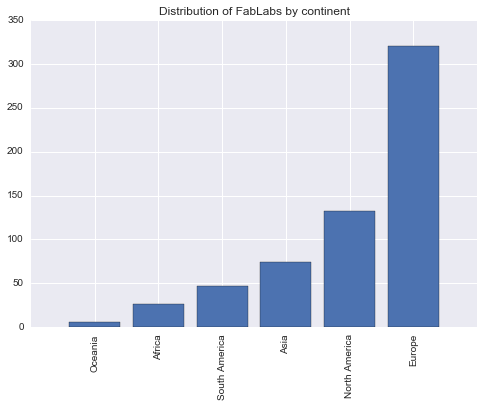

In [9]:
# Get distribution of FabLabs per continent

continents_stats = {}

for k in sortedcontinents:
    continents_stats[k] = 0
    for h in sortedcontinents[k]:
        continents_stats[k] += len(sortedcontinents[k][h])

continents_stats2 = OrderedDict(sorted(continents_stats.items(), key=lambda t: t[1]))    
    
plt.bar(range(len(continents_stats2)), continents_stats2.values(), align='center')
plt.xticks(range(len(continents_stats2)), continents_stats2.keys(), rotation=90)
plt.title("Distribution of FabLabs by continent")

plt.savefig('FabLabs-ContinentDistribution.pdf')

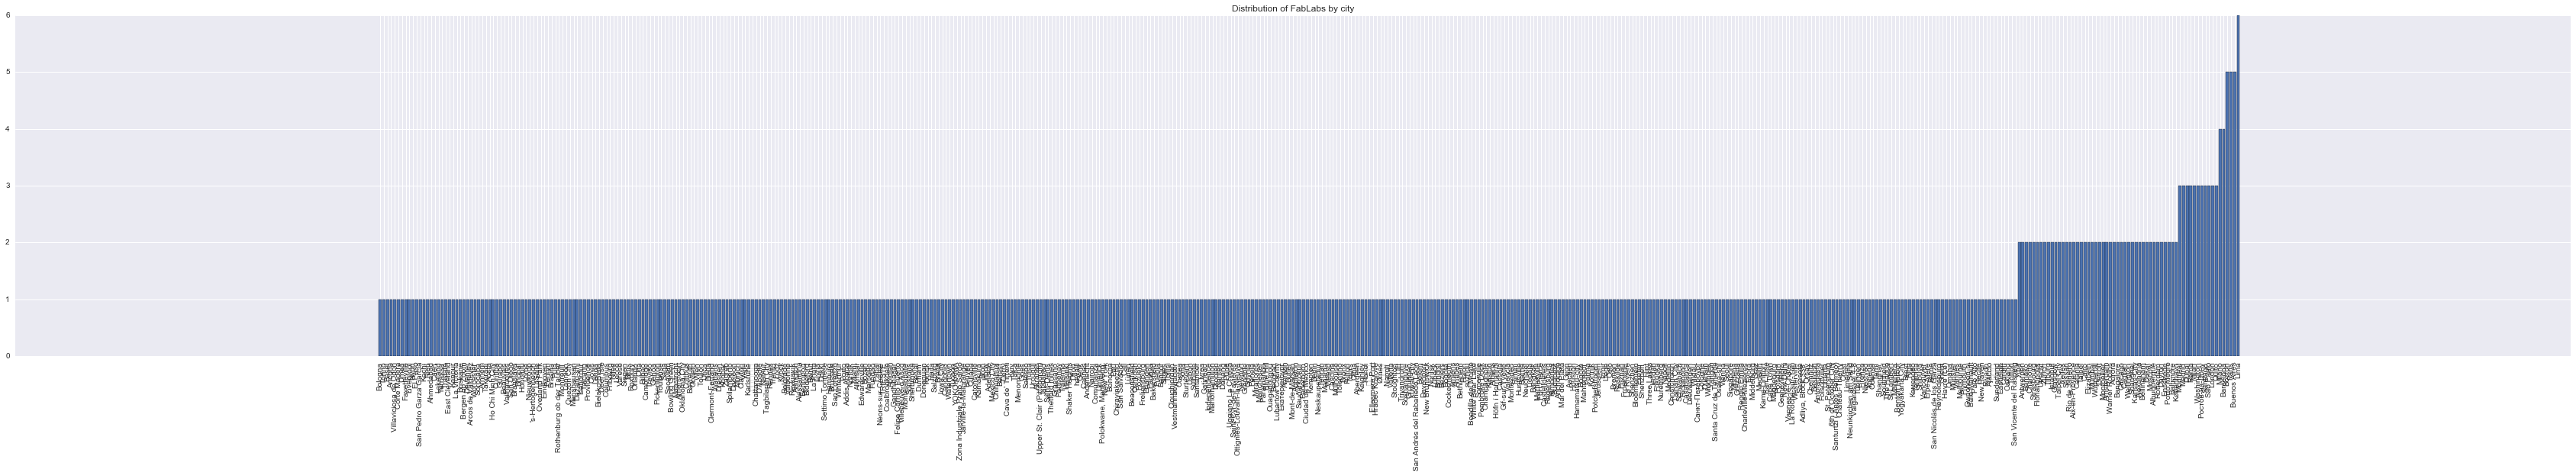

In [10]:
# Get distribution of FabLabs per city

# Get list from cities in the data
cities = {}

for j,m in enumerate(labs):
    if labs[m]["city"] not in cities:
        cities[labs[m]["city"]] = {}
    cities[labs[m]["city"]][j] = 1
    
# Delete cities without a name
if "" in cities:
    del cities[""]
    
cities_stats = {}

for i in cities:
    cities_stats[i] = len(cities[i])

cities_stats2 = OrderedDict(sorted(cities_stats.items(), key=lambda t: t[1]))    

figure(figsize=(60,8))
plt.bar(range(len(cities_stats2)), cities_stats2.values(), align='center')
plt.xticks(range(len(cities_stats2)), cities_stats2.keys(), rotation=90)
plt.title("Distribution of FabLabs by city")

plt.savefig('FabLabs-CityDistribution.pdf')